Ce dataset provient de Kaggle (source: https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset) Le but de ce dataset est de prédire le diamètre d'un astéroide pour pouvoir anticiper sa dangerosité. La taille du dataset étant conséquente, on essayera de réduire la dimension de celui-ci au maximum et certaines idées ne seront pas explorées.

# Importation

On n'importe pas les colonnes suivantes:

*   "id", "spkid","full_name","pdes","name","prefix" qui sont des valeurs (pratiquement) uniques permettant l'identification de l'instance
* "equinox qui n'a qu'une seule valeur possible
* "epoch" et "epoch_mjd" qui sont une répétition de "epoch_cal" dans un autre format
*"moid_ld" qui est une répétition de "moid"
* "per" qui est une répétition de "per_y"
* "tp" qui est une répétion de "tp_cal"
* "orbit_id" et "epoch_cal" pcq jugés inutiles
* "diameter_sigma" qui est déduite de "diameter" (qui ne sera normalement pas disponible lors du déploiement du modèle)

In [ ]:
import pandas as pd
columns = pd.read_csv("Asteroide.csv", nrows=0).columns
columns_to_keep = [col for col in columns if col not in ["id", "spkid","full_name","pdes","name","prefix","equinox",
                                                         "epoch","epoch_mjd","moid_ld","per","tp","orbit_id","epoch_cal","diameter_sigma"]]
df=pd.read_csv("Asteroide.csv",usecols=columns_to_keep)
df.shape

(958524, 30)

# Première découverte des données

In [ ]:
df.head()

,neo,pha,H,diameter,albedo,e,a,q,i,om,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
df.describe()

,H,diameter,albedo,e,a,q,i,om,w,ma,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,952261.000000,136209.000000,135103.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,16.906411,5.506429,0.130627,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,1.790405,9.425164,0.110323,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,-1.100000,0.002500,0.001000,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,16.100000,2.780000,0.053000,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,16.900000,3.972000,0.079000,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,17.714000,5.765000,0.190000,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,33.200000,939.400000,1.000000,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


Comme on peut le voir, les ordres de grandeur varient énormément entre les variables et pour les variables elles-mêmes aussi

On va réduire les valeurs des colonnes "sigma..." en appliquant une fonction logarithmique car les valeurs sont réparties sur une trop grande échelle allant de puissance 10 négatives (8 jusqu'à 12) à des puissances de 10 positives( 3 jusqu'à 11)

In [ ]:
import numpy as np
columns_log=[]
for column in ['sigma_e','sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per']:
  log_column="log_"+column
  columns_log.append(log_column)
  df[log_column]=df[column].apply(np.log)
  df.drop(column,axis=1,inplace=True)
df.columns

Index(['neo', 'pha', 'H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'class', 'rms',
       'log_sigma_e', 'log_sigma_a', 'log_sigma_q', 'log_sigma_i',
       'log_sigma_om', 'log_sigma_w', 'log_sigma_ma', 'log_sigma_ad',
       'log_sigma_n', 'log_sigma_tp', 'log_sigma_per'],
      dtype='object')

On va aussi créer 3 colonnes pour tp_cal car ils sont sous la forme de nombres concaténés: Année Mois Jour

In [ ]:
def extract_date(date):
  str_date=str(date)
  return int(str_date[0:4]),int(str_date[4:6]),int(str_date[6:8])
df[["tp_cal_year","tp_cal_month","tp_cal_day"]]=df["tp_cal"].apply(extract_date).apply(pd.Series)
df.drop(columns=["tp_cal"],inplace=True)

Regardons maintenant les pourcentages de valeurs manquantes:

In [ ]:
tmp=df.isna().mean()
tmp[tmp>0].sort_values(ascending=False)

,0
albedo,0.859051
diameter,0.857897
log_sigma_per,0.020788
log_sigma_ad,0.020788
log_sigma_q,0.020784
log_sigma_tp,0.020784
log_sigma_n,0.020784
log_sigma_ma,0.020784
log_sigma_w,0.020784
log_sigma_om,0.020784


Pour notre variable cible, 85% des données sont manquantes... On va dans un premier temps supprimer ces valeurs.

# Etude des données & Preprocessing

## Etat des données après suppression

In [ ]:
df_filtered=df.dropna(subset=["diameter"])
df_filtered.shape

(136209, 32)

Regardons maintenant ce que cela a changé pour nos ratios de valeurs manquantes:

In [ ]:
tmp=df_filtered.isna().sum()
tmp[tmp>0]

,0
H,4164
albedo,1109


Cela a pratiquement enlevé tous les NA, essayons de regarder si le contenu de certaines colonnes n'en a pas aussi été affecté:

In [ ]:
columns= df_filtered.columns.tolist()
columns_categorical=[]
for column in columns:
  unique_values=df_filtered[column].unique()
  if len(unique_values)<50:
    print(f"\n Valeurs de {column}:")
    print(unique_values)
    columns_categorical.append(column)
columns_numeric=[column for column in columns if column not in columns_categorical]
assert((len(columns_numeric)+len(columns_categorical))==df_filtered.shape[1])


 Valeurs de neo:
['N' 'Y']

 Valeurs de pha:
['N' 'Y']

 Valeurs de class:
['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO']

 Valeurs de tp_cal_year:
[2018 2020 2022 2021 2019 2017 2023 2024 2025 2016 2014 1996 2011 2015
 2004 2026 2009 1991 2003 2002 1970 1928 2038 2033 2006 2032 2028 2012
 2010 2008 2013 2036 2000 2007 2005 2027]

 Valeurs de tp_cal_month:
[ 4  7 11  5  3 10 12  1  6  8  9  2]

 Valeurs de tp_cal_day:
[30 21 23  9 17 10 26  2 15  7 25 19 27  5  3  4 24  1 16 11 12 22 20 29
  6 28 13 18  8 31 14]


Regardons les distributions des dates pour voir si on ne se retrouve pas avec juste une période donnée à cause de la suppression des données:

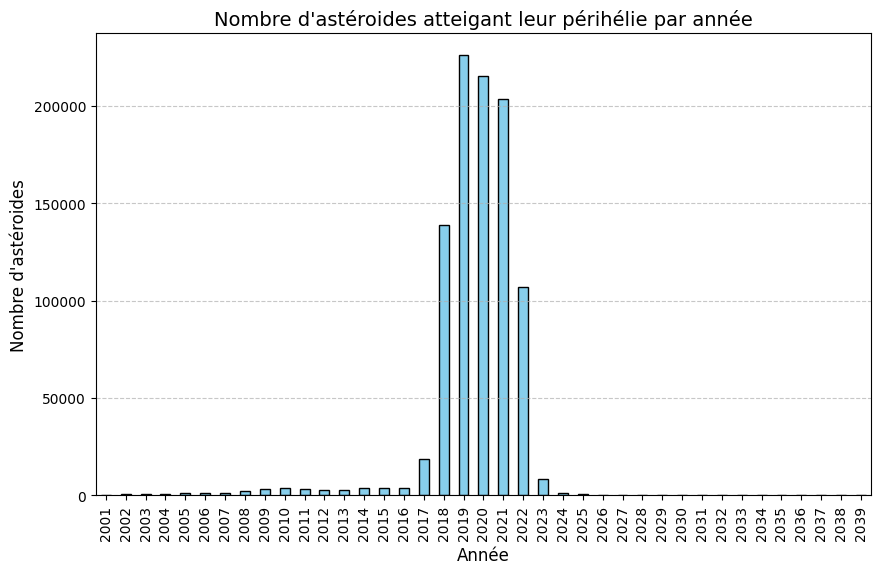

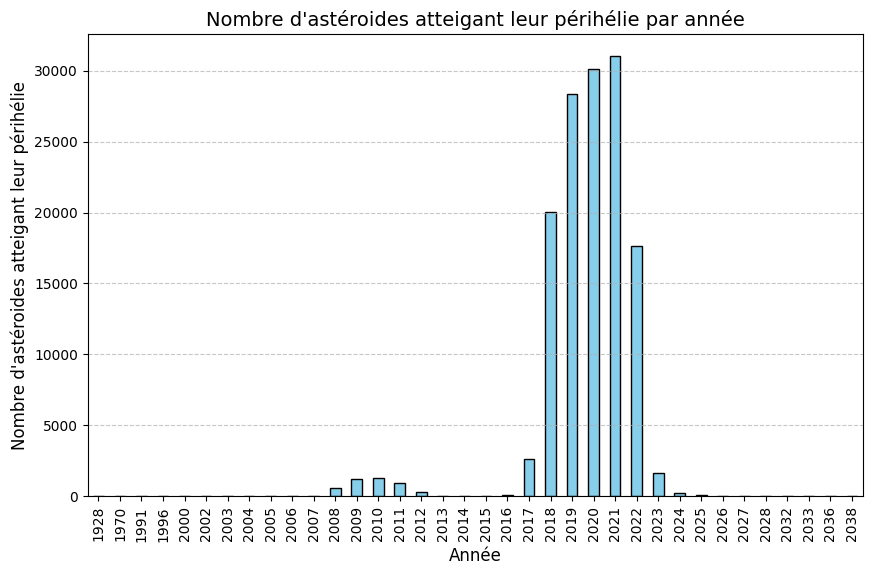

In [ ]:
import matplotlib.pyplot as plt

data_grouped = df[(df.tp_cal_year>2000) & (df.tp_cal_year<2040) ].groupby("tp_cal_year").count()["tp_cal_day"]
plt.figure(figsize=(10, 6))
data_grouped.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Nombre d'astéroides atteigant leur périhélie par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'astéroides", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

data_grouped = df_filtered.groupby("tp_cal_year").count()["tp_cal_day"]
plt.figure(figsize=(10, 6))
data_grouped.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Nombre d'astéroides atteigant leur périhélie par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'astéroides atteigant leur périhélie", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

Le fait de supprimer 85% des données a reduit le poids des dates qui étaient pratiquement toutes contenues entre 2017-2023

## Visualisation des colonnes

Regardons dans un premier temps les outliers et la répartition des données avec un boxplot et un hisplot pour chaque colonne

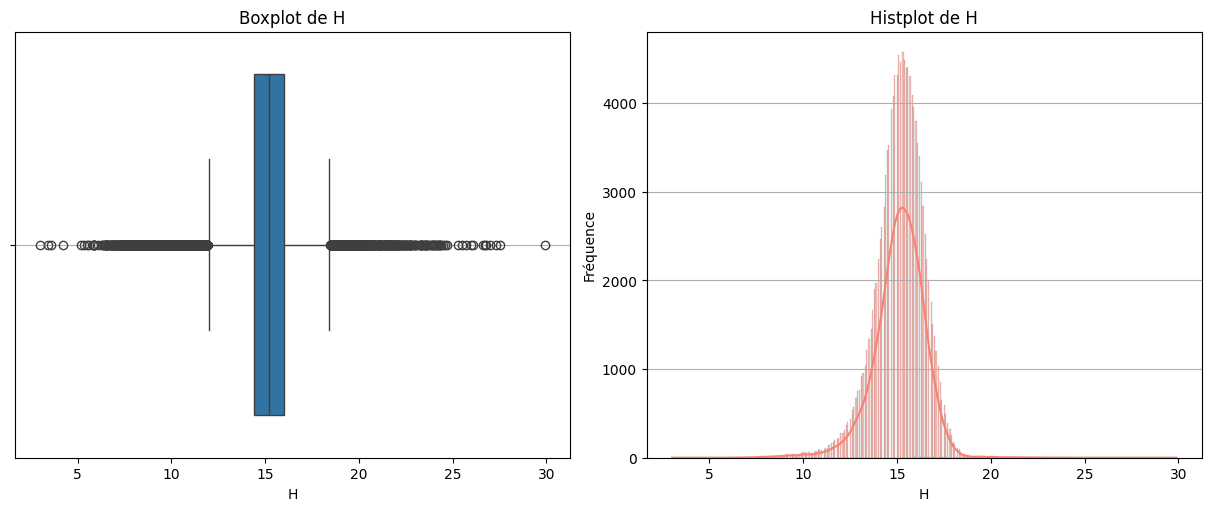

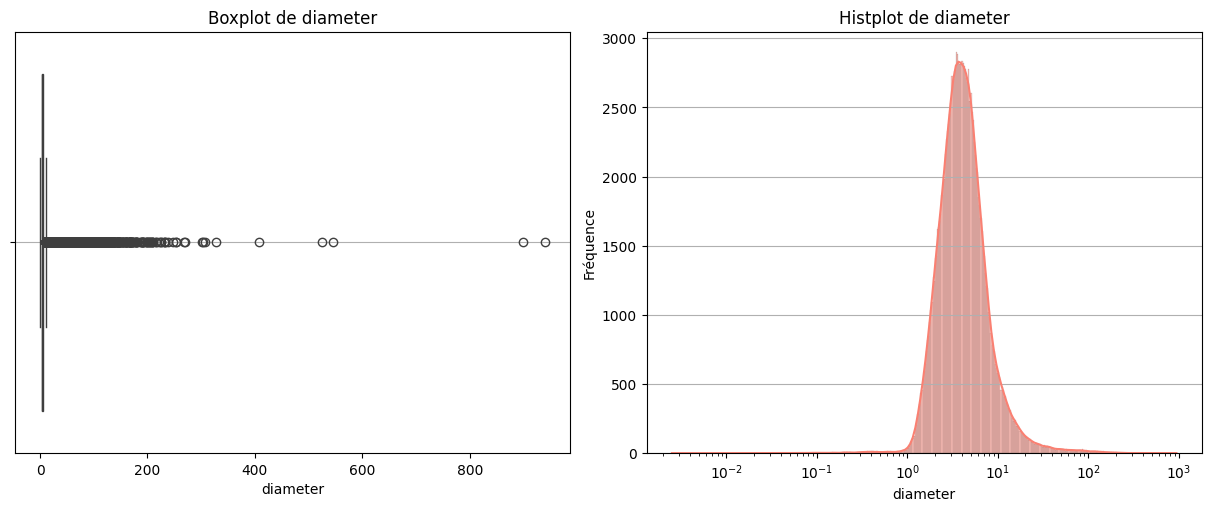

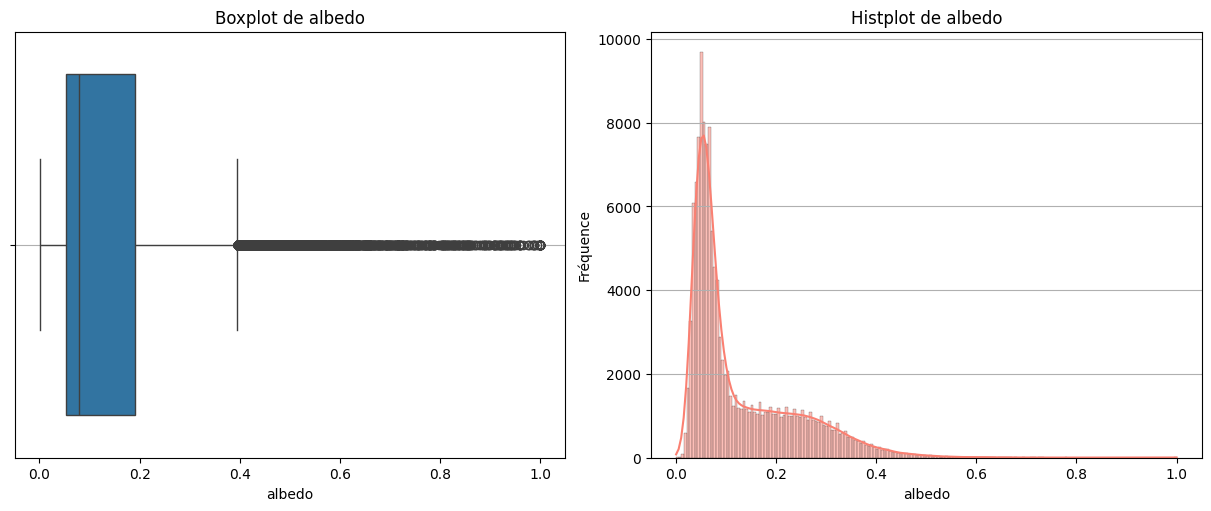

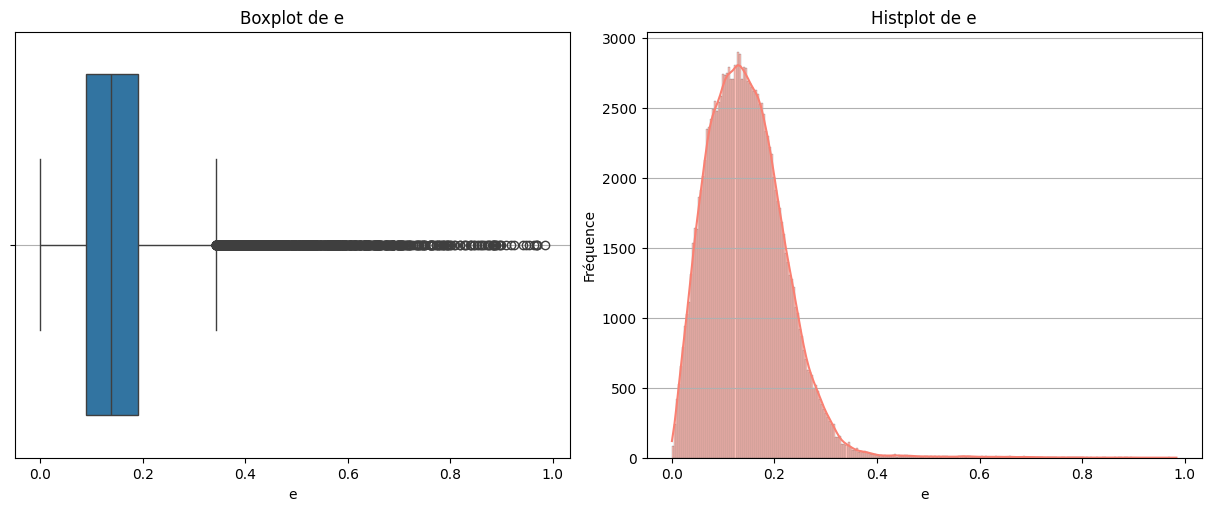

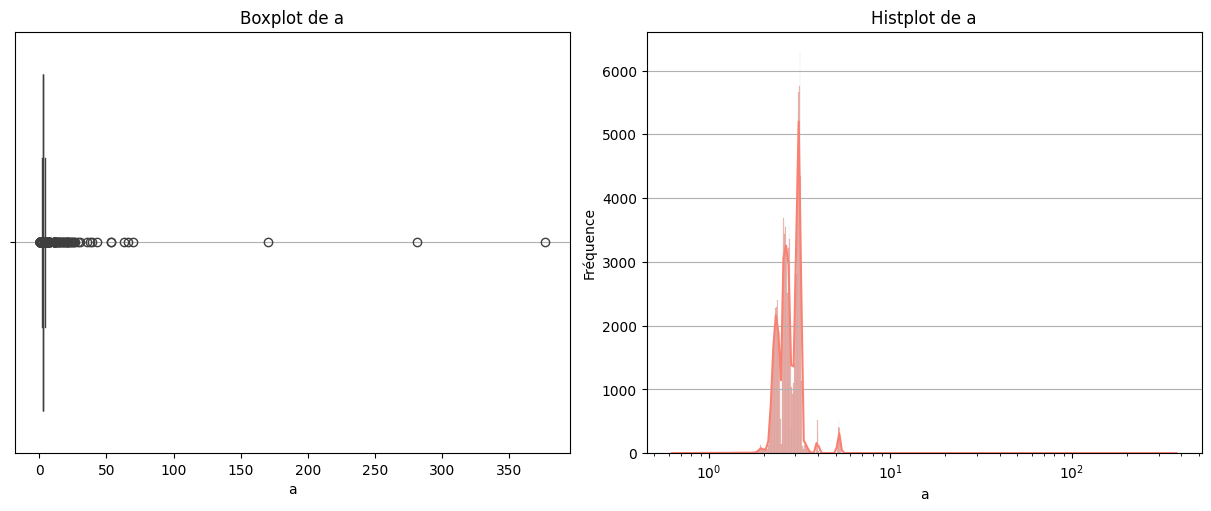

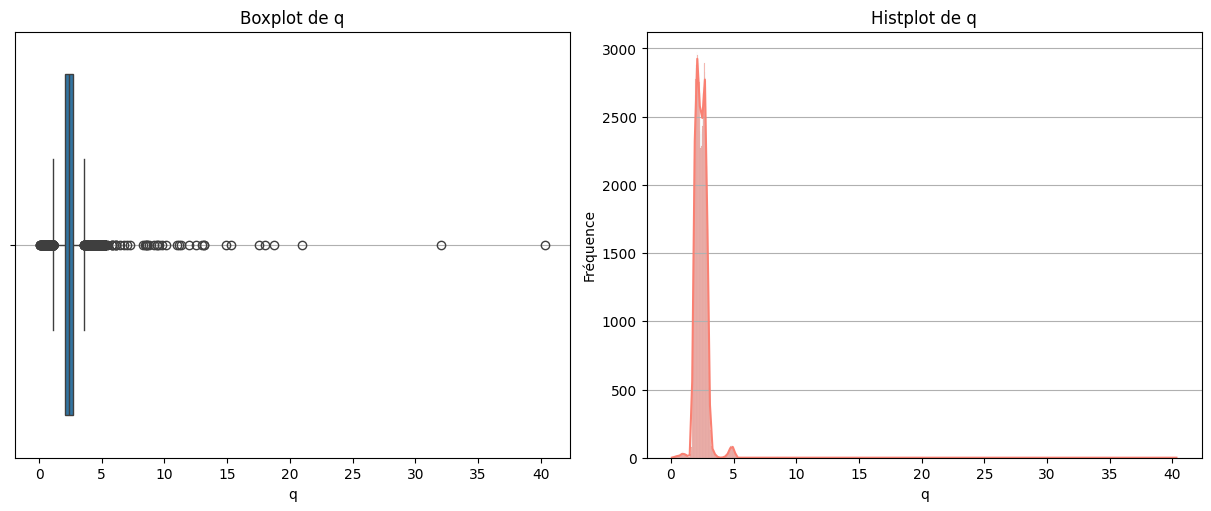

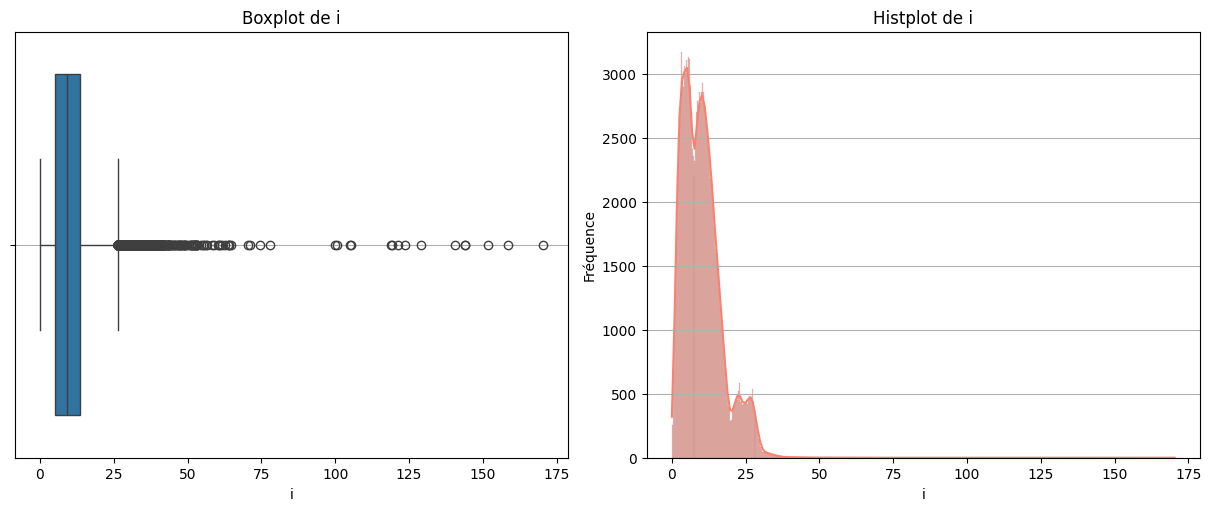

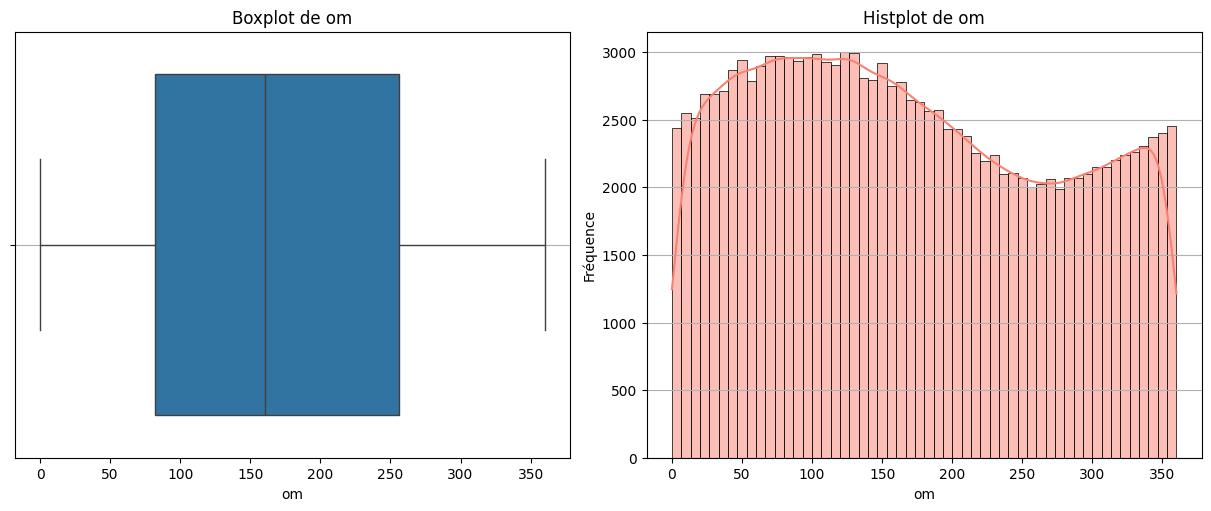

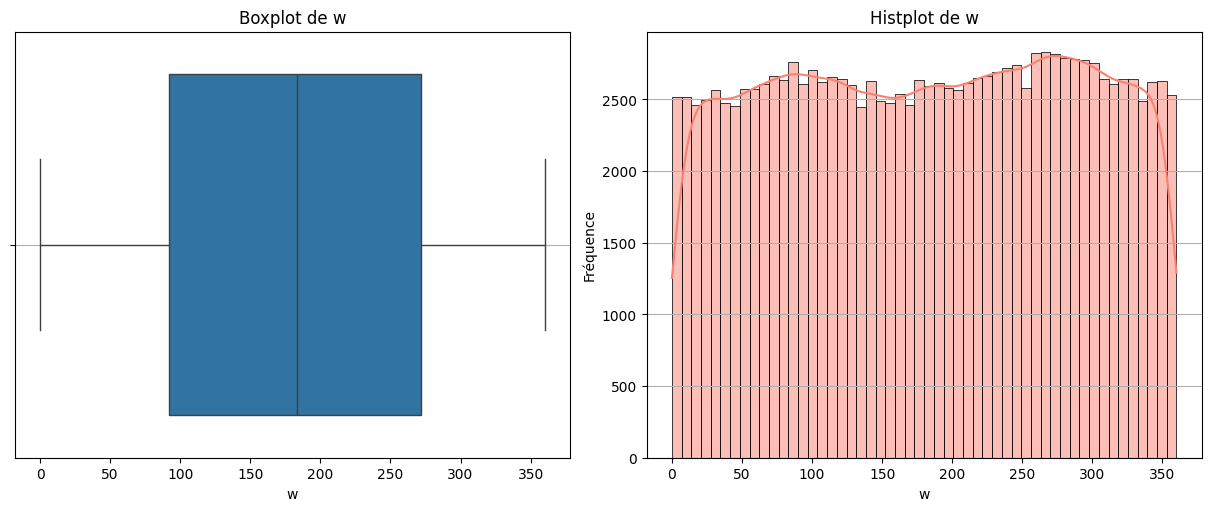

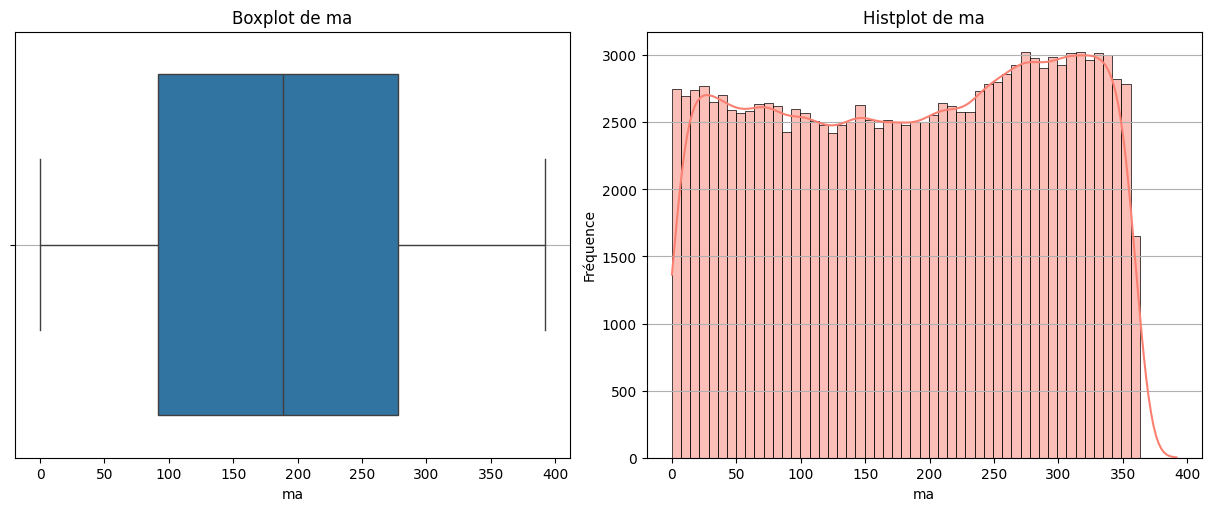

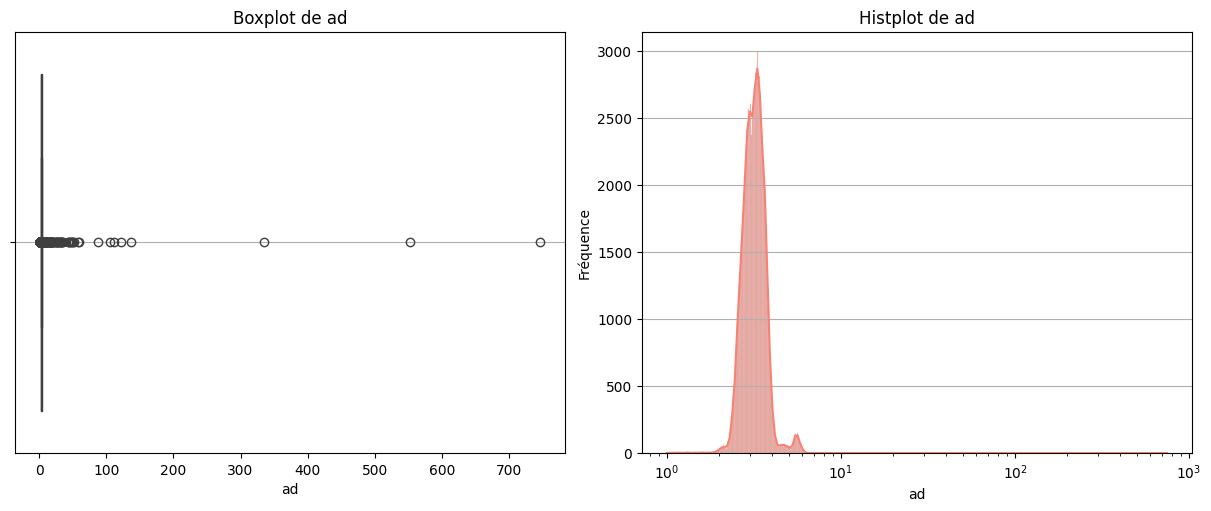

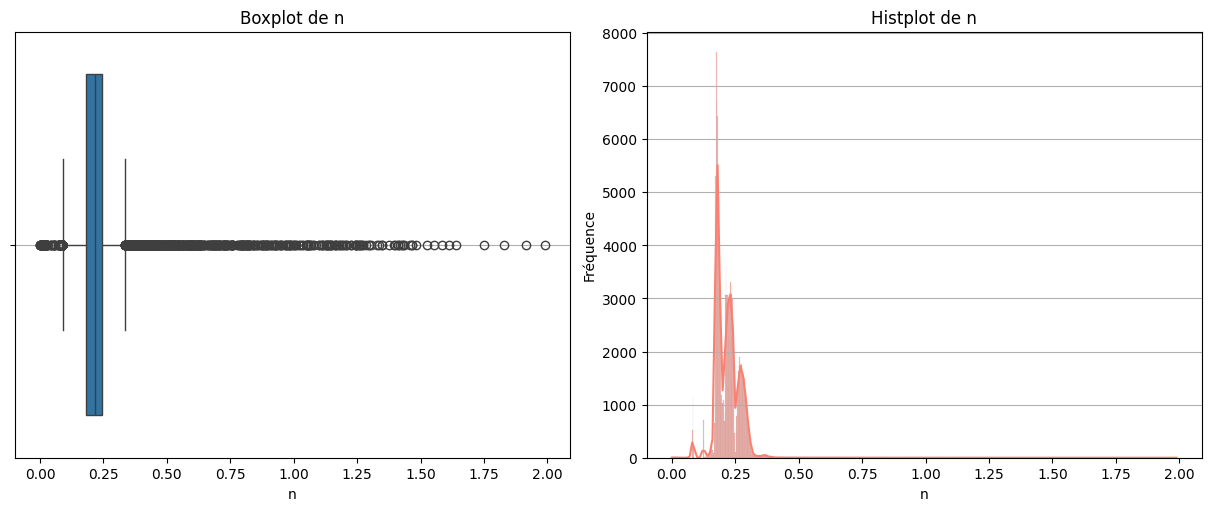

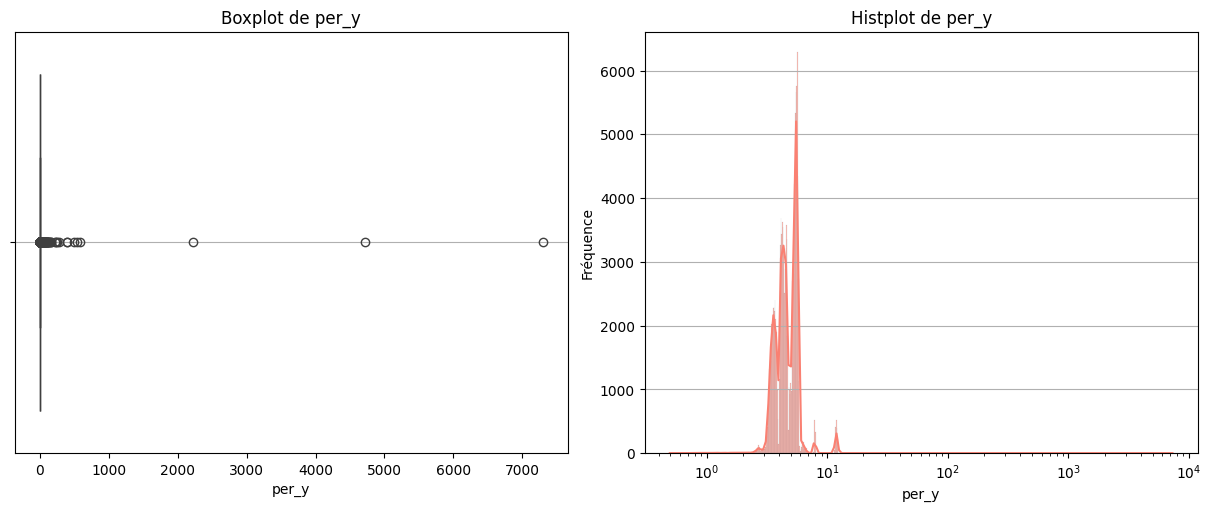

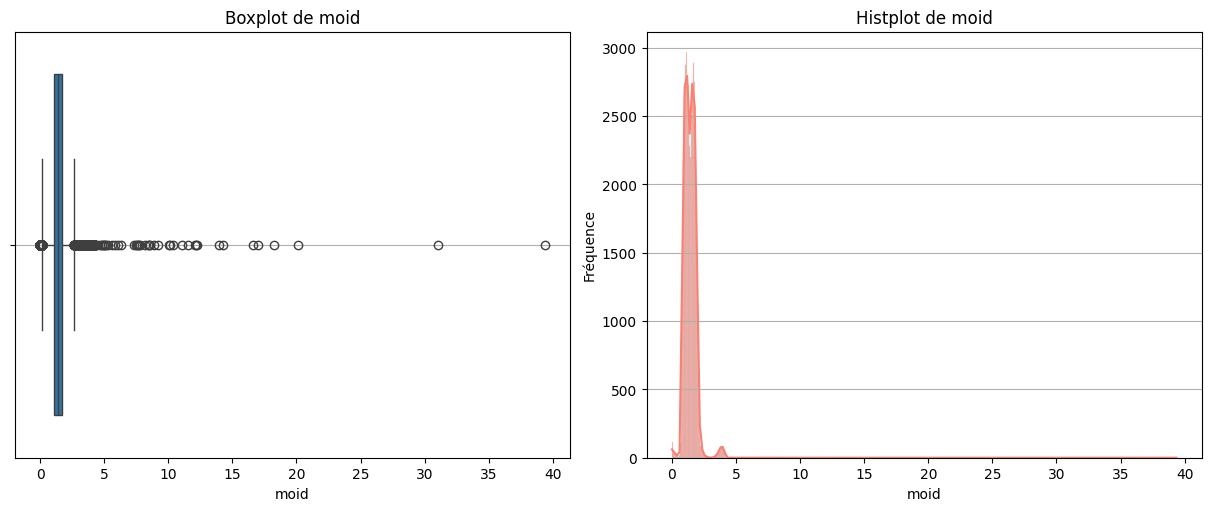

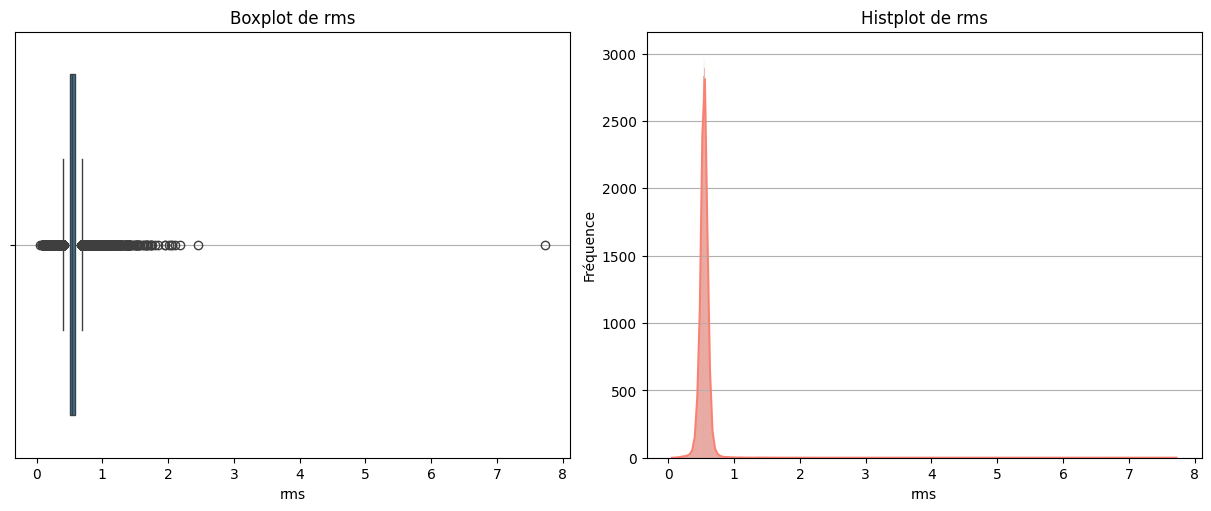

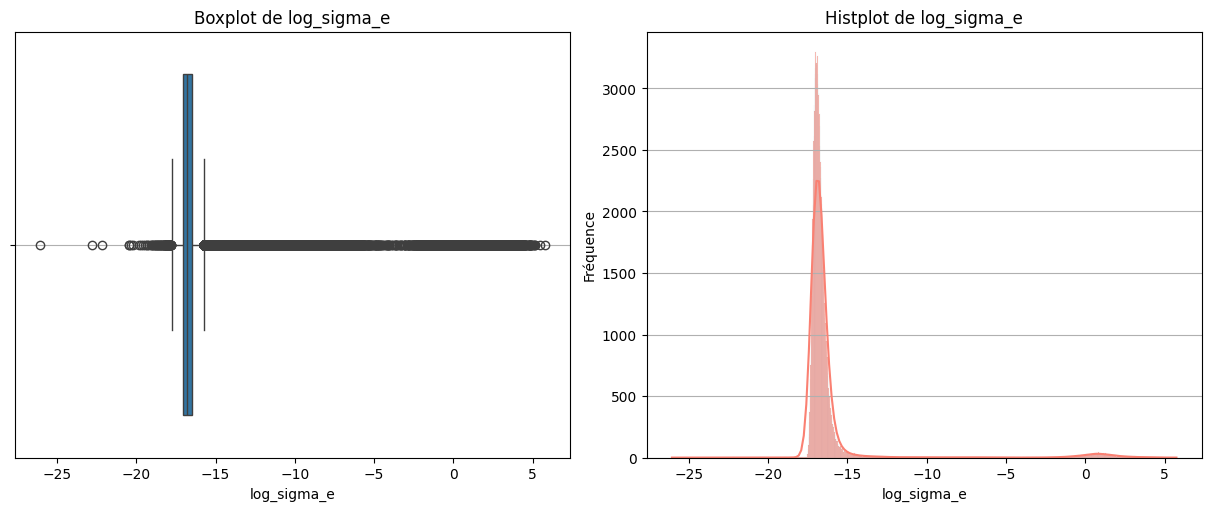

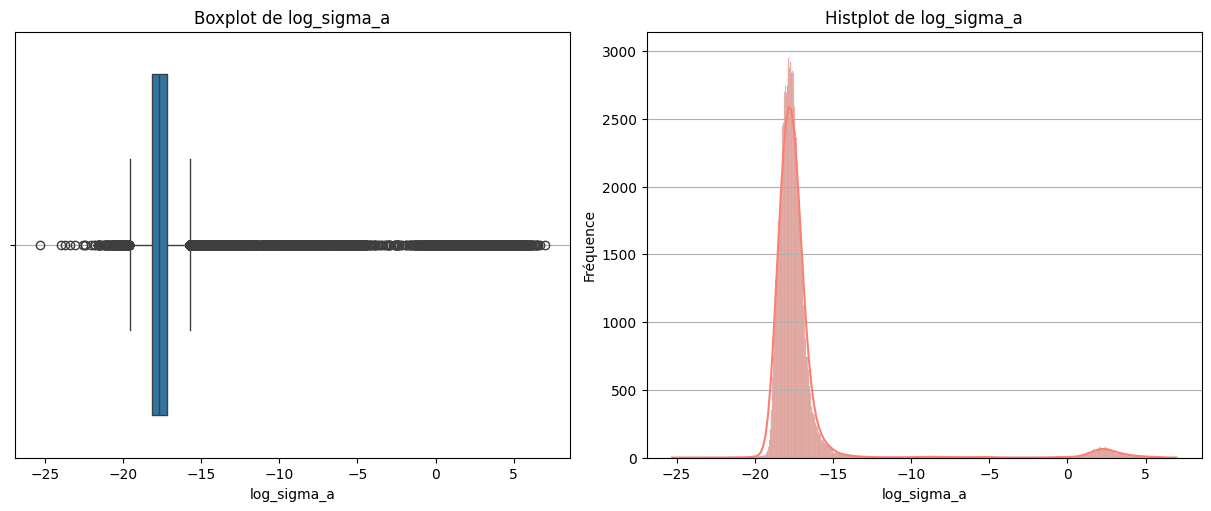

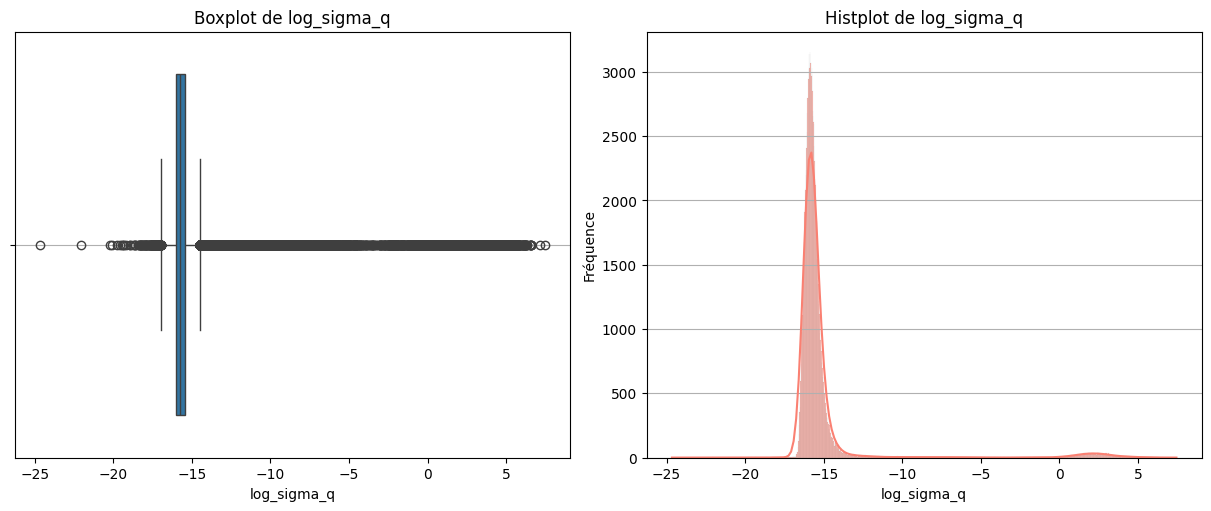

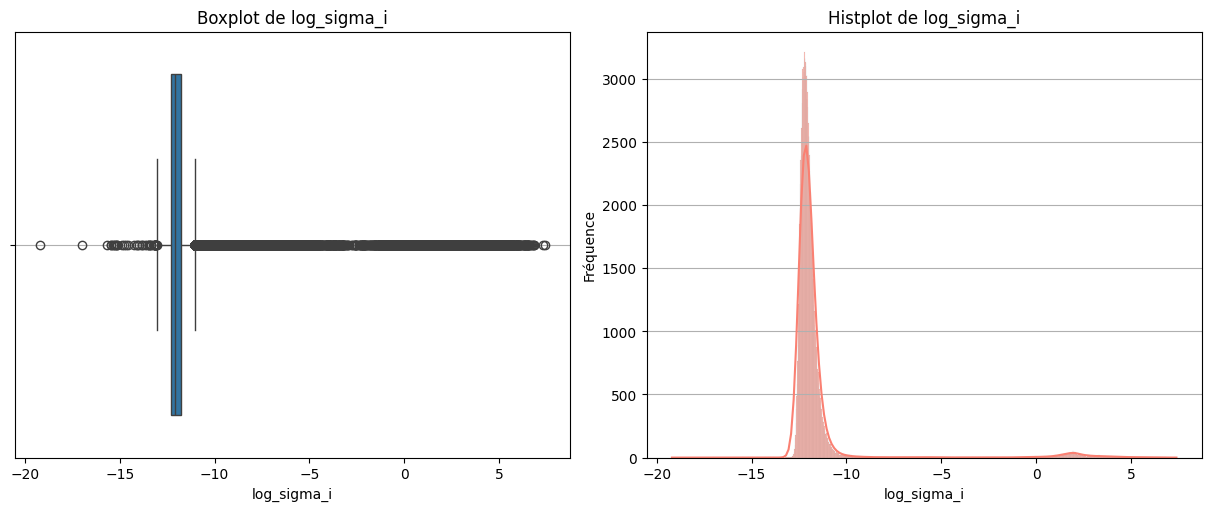

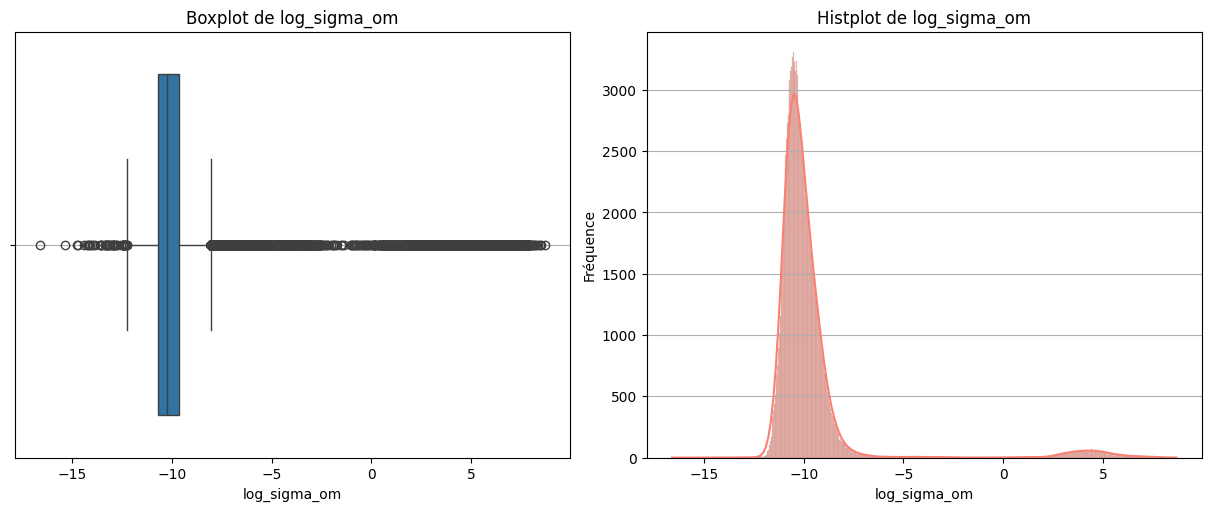

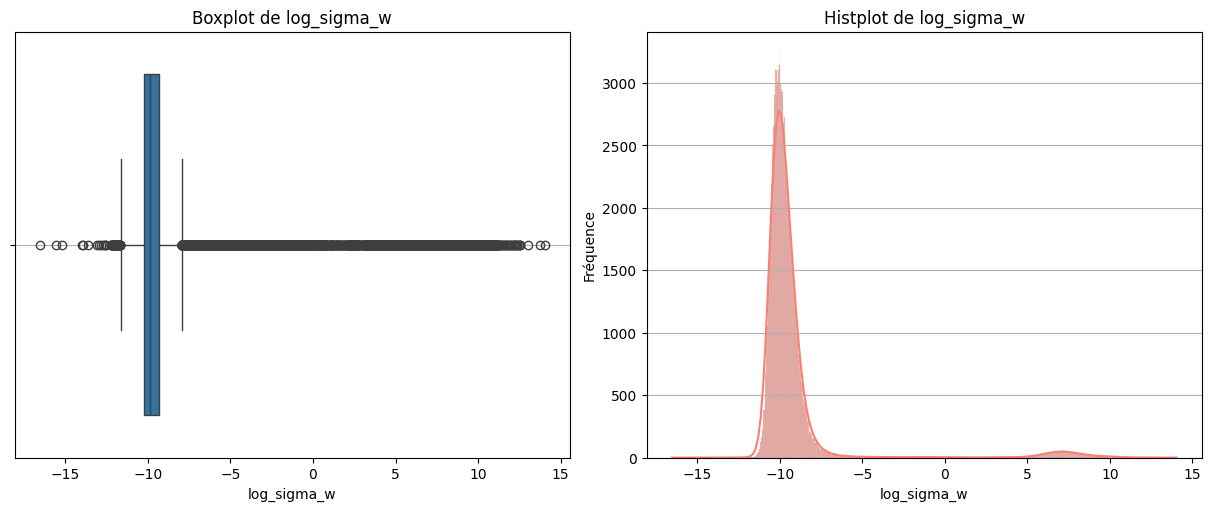

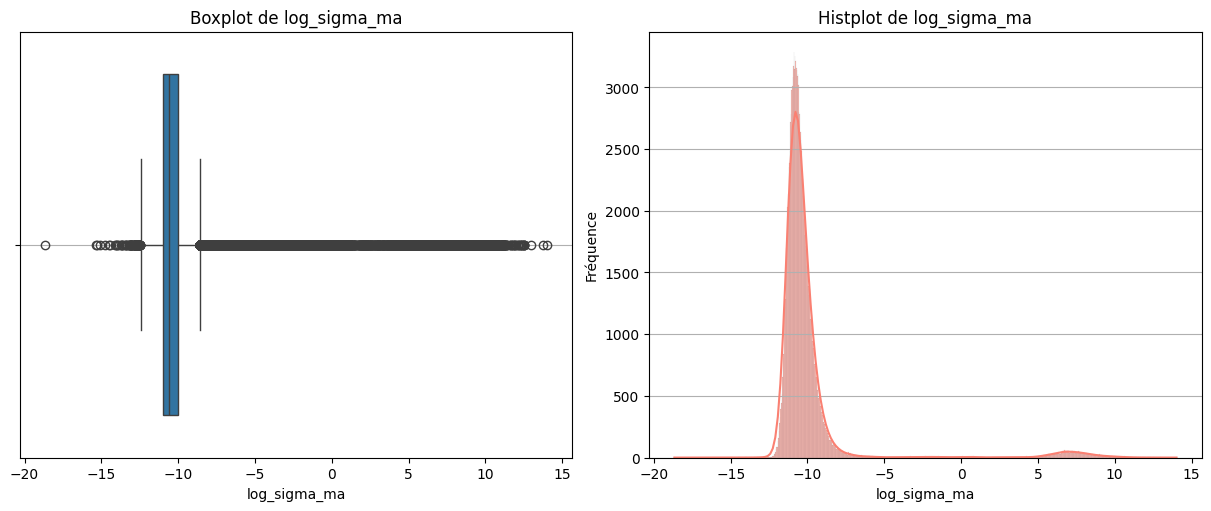

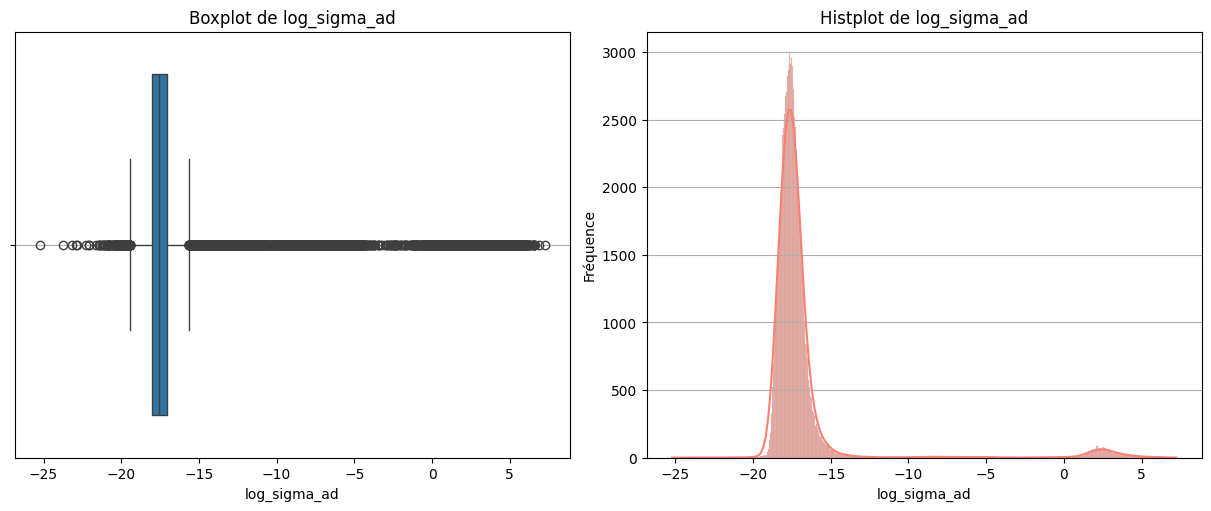

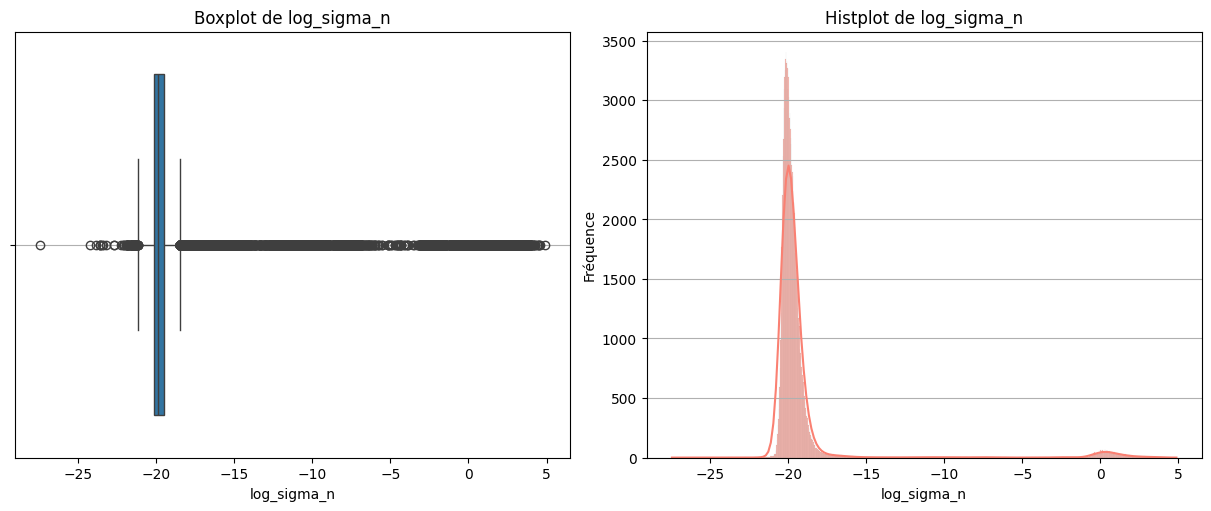

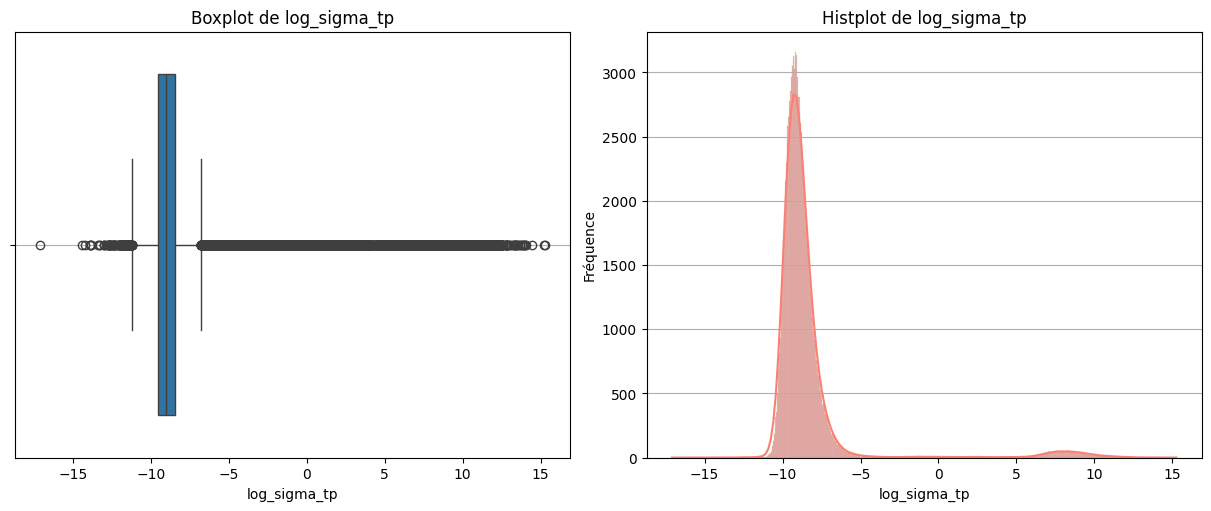

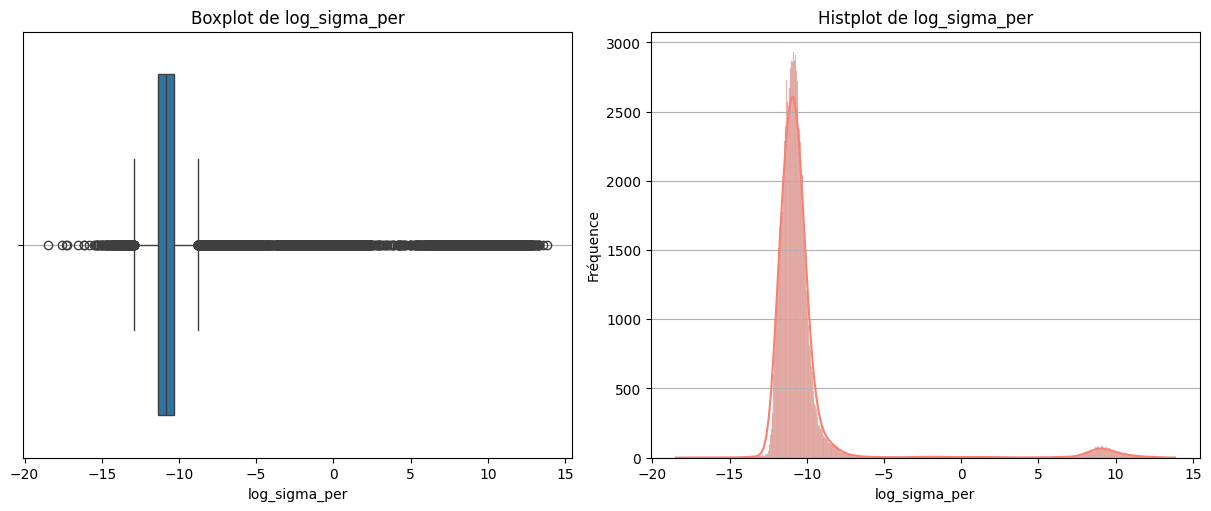

In [ ]:
import seaborn as sns

for column in columns_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # Boxplot à gauche
    sns.boxplot(x=df_filtered[column], ax=axes[0])
    axes[0].set_title(f"Boxplot de {column}")
    axes[0].set_xlabel(column)
    axes[0].grid(axis='y')

    # Histplot à droite
    boolean=False
    if column in ["diameter","a","ad","per_y"]:
      boolean=True
    sns.histplot(x=df_filtered[column], ax=axes[1], color='salmon', kde=True,log_scale=boolean)
    axes[1].set_title(f"Histplot de {column}")
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Fréquence")
    axes[1].grid(axis='y')

    plt.show()




Pour transformer les données on va utiliser:

*  Linear scaling: "ma", "w" et "om" correspondent à des degrés: leurs valeurs sont donc comprises entre 0 et 360 et ont une répartition uniforme
*  Z-scaling : "H", "diameter", "e", "q", "ad", "moid", "rms"
* Log-scaling: "Albedo"
* Catégorisation par quantile: "a", "i", "n", "per_y"

In [ ]:
columns_to_linear_scale=["ma","w","om"]
columns_to_Z_scale=[ "H", "e", "q", "ad", "moid", "rms"]
columns_to_log_scale=["albedo"]
columns_to_categorical=[ "a", "i", "n", "per_y" ]

On remarque aussi sur les graphiques qu'une "bosse" apparaît sur certaines colonnes, essayons de comprendre pourquoi (elles apparaissent toutes pour les colonnes "log_sigma...")

In [ ]:
def detect_outliers_indices(df, column,k=5):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*k*IQR
    upper_bound = Q3 + 1.5*k*IQR
    outliers_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    return outliers_indices

# On va regarder l'intersection des instances qui sont des outliers pour toutes les colonnes "log_sigma..."
outliers_log_sigma_e = detect_outliers_indices(df_filtered, "log_sigma_e")
outliers_log_sigma_a = detect_outliers_indices(df_filtered, "log_sigma_a")
intersection_log_outliers=list(set(outliers_log_sigma_a).intersection(outliers_log_sigma_e))
for col in ['log_sigma_q', 'log_sigma_i', 'log_sigma_om', 'log_sigma_w', 'log_sigma_ma',
'log_sigma_ad', 'log_sigma_n', 'log_sigma_tp', 'log_sigma_per']:
  outliers = detect_outliers_indices(df_filtered, col)
  if len(outliers)>0 and ("log" in col):
    intersection_log_outliers=list(set(outliers).intersection(intersection_log_outliers))
len(intersection_log_outliers)

4293

Il semblerait que ce soient les mêmes valeurs qui pour chaque log donne cette petite "bosse" isolée, essayons de voir si ces différences ne peuvent pas être expliqués par un facteur temporel:

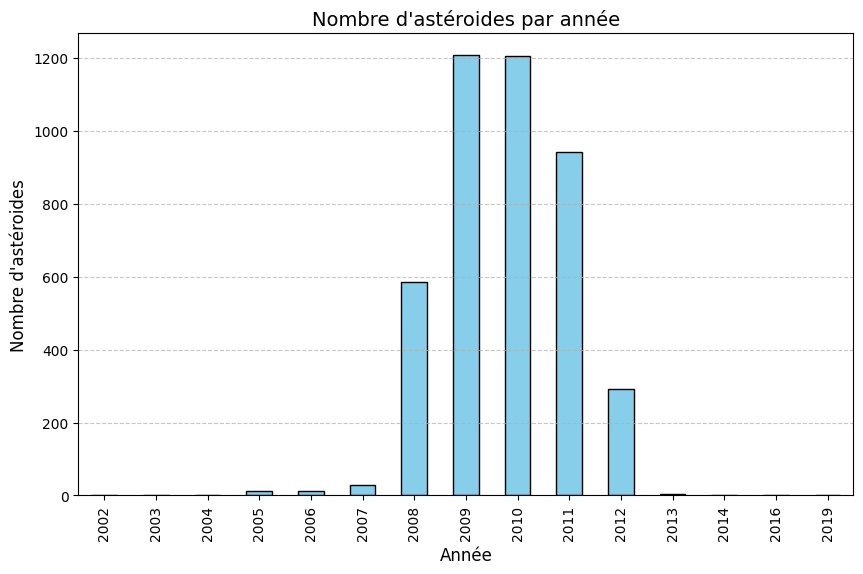

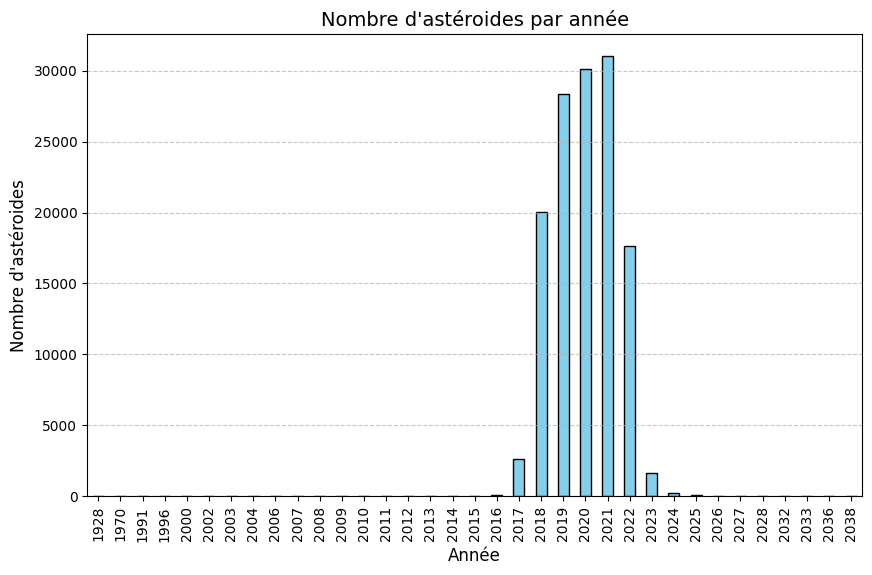

In [ ]:
data_grouped = df_filtered[df_filtered.index.isin(intersection_log_outliers)].groupby("tp_cal_year").count()["tp_cal_day"]
plt.figure(figsize=(10, 6))
data_grouped.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Nombre d'astéroides par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'astéroides", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()
data_grouped = df_filtered[~df_filtered.index.isin(intersection_log_outliers)].groupby("tp_cal_year").count()["tp_cal_day"]
plt.figure(figsize=(10, 6))
data_grouped.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Nombre d'astéroides par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'astéroides", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

On remarque que les "bosses" des colonnes "log_sigma..." correspondent à une répartition des astéroides. Cette "bosse" est visible car on a réduit le nombre de données et augmenté l'importance des astéroides dans cette période

Pour essayer d'atténuer ce problème, on pourrait envisager ensuite de créer une colonne boolénne indiquant si l'on est ou pas dans cette zone d'outliers (Et éventuellement entraîner les modèles avec et sans cette colonne pour comparer)

## Gestion des valeurs manquantes

Essayons de voir tout d'abord si ces colonnes ne sont pas corrélées entre elle:

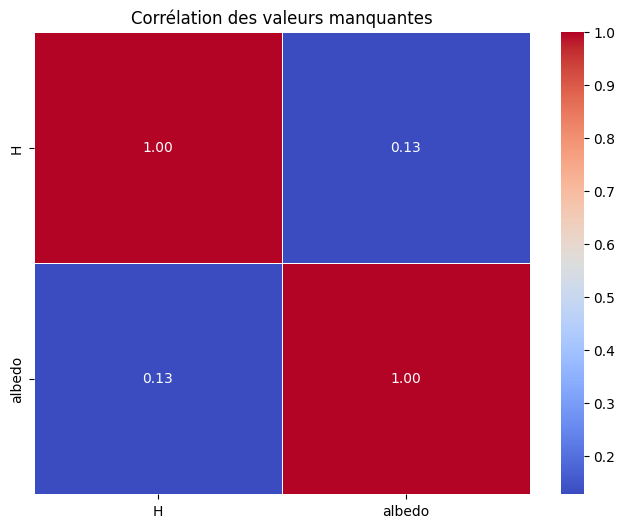

In [ ]:
missing_data = df_filtered[["H","albedo"]].isna().astype(int)
correlation_missing = missing_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_missing, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation des valeurs manquantes")
plt.show()


Au vu de la proportion des valeurs manquantes, on va remplacer par la moyenne les valeurs manquantes

## Préprocessing des colonnes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,KBinsDiscretizer, FunctionTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

def impute_mean(df,cols):
    imputer = SimpleImputer(strategy='mean')
    df_imputed = imputer.fit_transform(df[cols])
    df[cols]=pd.DataFrame(df_imputed, columns=[cols],index=df.index)

def preprocess(X,y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
  X_test, X_val, y_test, y_val=train_test_split(X_val, y_val, test_size=0.5, random_state=42)
  impute_mean(X_train,["H","albedo"])
  impute_mean(X_val,["H","albedo"])
  impute_mean(X_test,["H","albedo"])

  scalers = {'standard': StandardScaler(),'linear': MinMaxScaler(),'log': FunctionTransformer(np.log, validate=True),
            'discretization':KBinsDiscretizer(),'one-hot': OneHotEncoder()}
  preprocessor = ColumnTransformer(transformers=[('standard', scalers['standard'], columns_to_Z_scale),
          ('linear', scalers['linear'], columns_to_linear_scale),('log', scalers['log'], columns_to_log_scale),
          ('discretization', scalers['discretization'], columns_to_categorical),('one-hot',scalers['one-hot'],["class","neo","pha"])])

  X_train_processed = preprocessor.fit_transform(X_train)
  X_val_processed = preprocessor.transform(X_val)
  X_test_processed = preprocessor.transform(X_test)
  return X_train_processed,y_train,X_val_processed,y_val,X_test_processed,y_test

Dans un premier temps, on va d'abord évaluer avec un sous-ensemble des colonnes pour voir les performances. On enlève les "logs_sigma_..." car ces colonnes sont très fortement corrélées entre elle.

In [ ]:
df_filtered[columns_numeric].corr().iloc[16:,16:]


,log_sigma_a,log_sigma_q,log_sigma_i,log_sigma_om,log_sigma_w,log_sigma_ma,log_sigma_ad,log_sigma_n,log_sigma_tp,log_sigma_per
log_sigma_a,1.000000,0.990733,0.984736,0.933716,0.963405,0.978138,0.999842,0.994216,0.979598,0.999769
log_sigma_q,0.990733,1.000000,0.989730,0.943144,0.969502,0.976641,0.990760,0.992277,0.973685,0.989048
log_sigma_i,0.984736,0.989730,1.000000,0.938761,0.964697,0.974715,0.985111,0.991057,0.968208,0.982102
log_sigma_om,0.933716,0.943144,0.938761,1.000000,0.980497,0.931744,0.933351,0.945413,0.921612,0.930078
log_sigma_w,0.963405,0.969502,0.964697,0.980497,1.000000,0.976297,0.961952,0.970372,0.969960,0.960672
log_sigma_ma,0.978138,0.976641,0.974715,0.931744,0.976297,1.000000,0.975755,0.981086,0.996510,0.976189
log_sigma_ad,0.999842,0.990760,0.985111,0.933351,0.961952,0.975755,1.000000,0.994350,0.976889,0.999552
log_sigma_n,0.994216,0.992277,0.991057,0.945413,0.970372,0.981086,0.994350,1.000000,0.974929,0.991677
log_sigma_tp,0.979598,0.973685,0.968208,0.921612,0.969960,0.996510,0.976889,0.974929,1.000000,0.979172
log_sigma_per,0.999769,0.989048,0.982102,0.930078,0.960672,0.976189,0.999552,0.991677,0.979172,1.000000


# Modèles de prédiction

## Premiers modèles: Ridge, Random Forest et Gradient Boosting

In [ ]:
X = df_filtered.drop(columns=["diameter",'tp_cal_year', 'tp_cal_month', 'tp_cal_day']+columns_log[1:])
y = df_filtered['diameter']
X_train,y_train,X_val,y_val,X_test,y_test=preprocess(X,y)

On choisit un modèle simple (Ridge) pour évaluer les performances d'un modèle linéaire tout d'abord. Ensuite, on utilise deux algorithmes d'ensemble plus complexes et performants avec une complexité algorithmique plus raisonnable (par exemple SVM) sur un jeu de données aussi grand.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

models = {'Ridge': Ridge(),'RandomForest': RandomForestRegressor(random_state=42),
          'GradientBoosting': GradientBoostingRegressor(random_state=42)
          }
param_grid = { 'Ridge': {'alpha':[0.1,1,10]},'RandomForest': {'max_depth':[10,20,None],'max_features': [20, None]},
    'GradientBoosting': {'learning_rate': [0.1,0.5,1]},
               }

On décide d'utilise la MSE comme métrique et fonction de perte car on souhaite pénaliser fortement les écarts sur les grands diamètres.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

best_model = None
best_params = None
best_score = float('inf')
best_model_name = None
# On stocke tous les résultats dans ce dictionnaire avec les hyperparamètres
dict_all_results={}

for name, model in models.items():
    print(f"Optimisation pour le modèle {name}...")
    grid = ParameterGrid(param_grid[name])
    dict_all_results[name] = {}
    for params in grid:
      model.set_params(**params)
      model.fit(X_train, y_train)
      y_val_pred = model.predict(X_val)
      val_score = mean_squared_error(y_val, y_val_pred)
      train_score=mean_squared_error(y_train,model.predict(X_train))
      dict_all_results[name][tuple(params.items())] = val_score
      print("Score de validation:",val_score,"Score de train:",train_score,params)
      if val_score < best_score:
          best_model = model
          best_params = params
          best_score = val_score
          best_model_name = name


Optimisation pour le modèle Ridge...
Score de validation: 90.19782720692952 Score de train: 41.01847928578834 {'alpha': 0.1}
Score de validation: 90.18309435862403 Score de train: 41.01894641663308 {'alpha': 1}
Score de validation: 90.07439828954922 Score de train: 41.04383244986283 {'alpha': 10}
Optimisation pour le modèle RandomForest...
Score de validation: 23.836351378528303 Score de train: 1.8510920725122766 {'max_depth': 10, 'max_features': 20}
Score de validation: 9.977911768193644 Score de train: 0.9724742367872905 {'max_depth': 10, 'max_features': None}
Score de validation: 23.152108503251114 Score de train: 1.1571996080027362 {'max_depth': 20, 'max_features': 20}
Score de validation: 9.932464069299275 Score de train: 0.6866848226585871 {'max_depth': 20, 'max_features': None}
Score de validation: 22.93727493748364 Score de train: 1.1475124585443413 {'max_depth': None, 'max_features': 20}
Score de validation: 9.932666735293987 Score de train: 0.67392661587402 {'max_depth': None

In [ ]:
print("Le meilleur modèle est:",best_model)

Le meilleur modèle est: GradientBoostingRegressor(learning_rate=1, random_state=42)


On regarde ses performances sur notre jeu de test pour vérifier que le modèle se généralise bien.

In [ ]:
y_test_pred_ml = best_model.predict(X_test)
mean_squared_error(y_test, y_test_pred_ml)

1.7520359979384197

En fonction des attentes souhaitées, on pourrait se satisfaire de ce modèle ou continuer à chercher de meilleurs hyperparamètres. <br>
De plus, un astéroide est considéré comme dangereux si son diamètre dépasse 140 mètres (source: https://www.la-croix.com/Sciences-et-ethique/Mission-Dart-asteroides-sont-ils-veritablement-dangereux-Terre-2022-09-26-1201234970). Le modèle de régression choisi pourrait être utilisé pour imputer les valeurs manquantes, permettant de conserver 85 % du jeu de données initial. Enfin, on pourraît entraîner un modèle de classification binaire:

*   Dangereux: diamètre>140
*   Non-dangereux sinon

Ou si l'on veut se laisser une marge valant m (marge que l'on pourrait choisir en fonction des performances du modèle choisi):


*   Dangereux :diamètre> 140+ m
*   Incertain : 140-m < diamètre< 140+m
*  Non dangereux sinon

On pourrait aussi éventuellement créer une colonne en plus pour préciser si la valeur provient du modèle ou si elle est réelle pour permettre aux modèles de mieux s'ajuster.<br>
Bien évidemment, on pourrait aussi rajouter des catégories de classification si l'on veut donner la priorité pour la gestion des astéroides (ou simplement garder un modèle de régression)